# 2020 Year in Review - Strava Training Analysis

Strava is a social network of endurance athletes to connect, track and share progression in their fitness. I use the application to log my activities for training analysis and personal performance.

The purpose of this project was to explore my year in training using the Strava API to analyze the time I dedicated to training for the year for all of my logged runs, bikes and swims.

In [1]:
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pygal
from stravaio import strava_oauth2
from stravalib.client import Client

# Retrieve Client ID and API Secret from https://www.strava.com/settings/api

#strava_oauth2(client_id = config.client_id, client_secret=config.api_secret) # <----- Uncomment to retrieve access_token

In [2]:
client = Client(access_token = config.access_token)
#client.get_athlete() # <----- Uncomment to verify current athlete details

In [3]:
activities = client.get_activities(after = "2020-01-01T00:00:00Z", before = "2020-12-31T00:00:00Z")
#list(activities) #list all activities from given time range

In [4]:
#convert to a list
sample = list(activities)[0]
sample.to_dict()
sample

<Activity id=4332643354 name='Lunch Run with Brady' resource_state=2>

In [5]:
# retrieve columns needed and put into a separate list
# reference https://developers.strava.com/docs/reference/ for available parameters
my_cols =['name', 'type', 'distance',
         'moving_time','elapsed_time',
          'average_speed', 'max_speed',
          'average_heartrate', 'max_heartrate', 'suffer_score',
          'average_cadence', 'average_watts',
         'weighted_average_watts', 'max_watts',
          'total_elevation_gain', 'elev_high',
         'elev_low', 'start_date']

In [6]:
#iterate over all activites and save values
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])

In [7]:
#convert my_cols into a dataframe
df = pd.DataFrame(data, columns=my_cols)

In [8]:
#return number of rows and columns
df.shape

(313, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    313 non-null    object 
 1   type                    313 non-null    object 
 2   distance                313 non-null    float64
 3   moving_time             313 non-null    object 
 4   elapsed_time            313 non-null    object 
 5   average_speed           313 non-null    float64
 6   max_speed               313 non-null    float64
 7   average_heartrate       269 non-null    float64
 8   max_heartrate           269 non-null    float64
 9   suffer_score            269 non-null    float64
 10  average_cadence         232 non-null    float64
 11  average_watts           144 non-null    float64
 12  weighted_average_watts  96 non-null     float64
 13  max_watts               96 non-null     float64
 14  total_elevation_gain    313 non-null    fl

In [10]:
#Checking the existence of the null values in the dataset
df.isnull().sum(axis=0)

name                        0
type                        0
distance                    0
moving_time                 0
elapsed_time                0
average_speed               0
max_speed                   0
average_heartrate          44
max_heartrate              44
suffer_score               44
average_cadence            81
average_watts             169
weighted_average_watts    217
max_watts                 217
total_elevation_gain        0
elev_high                  33
elev_low                   33
start_date                  0
dtype: int64

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent * 100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
max_watts,217,69.329073
weighted_average_watts,217,69.329073
average_watts,169,53.993610
average_cadence,81,25.878594
max_heartrate,44,14.057508
suffer_score,44,14.057508
average_heartrate,44,14.057508
elev_high,33,10.543131
elev_low,33,10.543131
elapsed_time,0,0.000000


In [12]:
df.head()

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,average_cadence,average_watts,weighted_average_watts,max_watts,total_elevation_gain,elev_high,elev_low,start_date
0,Lunch Run with Brady,Run,8069.9,0:46:16,0:48:36,2.907,4.8,155.5,183.0,55.0,87.9,NaN,NaN,NaN,12.7,183.3,176.2,2020-11-13T17:15:05+00:00
1,London,VirtualRide,22722.0,0:45:26,0:45:26,8.335,16.9,135.3,159.0,20.0,74.1,122.9,126.0,206.0,124.0,34.2,3.0,2020-11-12T13:10:50+00:00
2,Cool down,Run,1635.4,0:09:41,0:09:44,2.815,3.8,155.3,160.0,12.0,87.7,NaN,NaN,NaN,4.6,183.3,178.5,2020-11-11T17:19:49+00:00
3,20 min Tempo Run,Run,4833.9,0:20:03,0:20:03,4.018,4.5,181.8,189.0,67.0,90.3,NaN,NaN,NaN,2.5,181.2,178.5,2020-11-11T16:55:52+00:00
4,Warm up,Run,1649.9,0:08:59,0:08:59,3.061,4.6,145.6,160.0,5.0,88.1,NaN,NaN,NaN,0.0,183.3,178.6,2020-11-11T16:44:37+00:00


In [13]:
df.shape

(313, 18)

# Data preparation and conversions

In [14]:
# Create an Indoor Ride flag for all virtual rides
df.insert(18, "indoor_flag", 0, allow_duplicates = False)
df.loc[(df['type'] == 'VirtualRide'), 'indoor_flag'] = 1

In [15]:
#heart rate zones are based off of my personal fitness
import datetime
df.insert(19, "heartrate_zone", 0, allow_duplicates = False)
df.loc[(df['average_heartrate'] <= 130), 'heartrate_zone'] = 'Zone 1'

df.loc[(df['average_heartrate'] <= 162) & (df['average_heartrate'] > 130), 'heartrate_zone'] = 'Zone 2'

df.loc[(df['average_heartrate'] <= 178) & (df['average_heartrate'] > 162), 'heartrate_zone'] = 'Zone 3'

df.loc[(df['average_heartrate'] <= 194) & (df['average_heartrate'] > 178), 'heartrate_zone'] = 'Zone 4'

df.loc[(df['average_heartrate'] > 194), 'heartrate_zone'] = 'Zone 5'

In [16]:
# Convert all VirtualRide types to 'Ride'
df = df.replace(['VirtualRide'],'Ride')

#convert distance in meters to miles for runs, rides and virtual rides
df.loc[:,'distance'] = round((df.distance / 1609),2)

#convert average_speed to mi/h
df.loc[:,'average_speed'] = round((df.average_speed * 2.24),2)

#convert average_speed to mi/h
df.loc[:,'max_speed'] = round((df.max_speed * 2.24),2)

#convert total_elevation_gain in meters to feet
df.loc[:,'total_elevation_gain'] = round((df.total_elevation_gain * 3.281),2)

#convert elev_high in meters to feet
df.loc[:,'elev_high'] = round((df.elev_high * 3.281),2)

#convert elev_low in meters to feet
df.loc[:,'elev_low'] = round((df.elev_low * 3.281),2)

#convert start_time to date time
df['start_date'] = pd.to_datetime(df['start_date'])

#convert moving_time to a time delta
df['moving_time'] = round((pd.to_timedelta(df['moving_time']).apply(lambda x: x/np.timedelta64(1,'m'))),2)

#total moving time hours
df['hours'] = round((df['moving_time'] / 60),2)

#year
df['year'] = df['start_date'].dt.year

#month
df['month'] = df['start_date'].dt.month

#month and year
df['month_year'] = df['start_date'].apply(lambda x: x.strftime('%Y-%m'))

df['week_no'] = df['start_date'].dt.isocalendar().week

#day of the week
df['day_of_week'] = df['start_date'].dt.day_name()


In [17]:
df.head(10)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
0,Lunch Run with Brady,Run,5.02,46.27,0:48:36,6.51,10.75,155.5,183.0,55.0,...,578.11,2020-11-13 17:15:05+00:00,0,Zone 2,0.77,2020,11,2020-11,46,Friday
1,London,Ride,14.12,45.43,0:45:26,18.67,37.86,135.3,159.0,20.0,...,9.84,2020-11-12 13:10:50+00:00,1,Zone 2,0.76,2020,11,2020-11,46,Thursday
2,Cool down,Run,1.02,9.68,0:09:44,6.31,8.51,155.3,160.0,12.0,...,585.66,2020-11-11 17:19:49+00:00,0,Zone 2,0.16,2020,11,2020-11,46,Wednesday
3,20 min Tempo Run,Run,3.00,20.05,0:20:03,9.00,10.08,181.8,189.0,67.0,...,585.66,2020-11-11 16:55:52+00:00,0,Zone 4,0.33,2020,11,2020-11,46,Wednesday
4,Warm up,Run,1.03,8.98,0:08:59,6.86,10.30,145.6,160.0,5.0,...,585.99,2020-11-11 16:44:37+00:00,0,Zone 2,0.15,2020,11,2020-11,46,Wednesday
5,Watopia,Ride,20.18,60.82,1:01:56,19.93,24.86,138.8,158.0,29.0,...,41.34,2020-11-10 21:57:44+00:00,1,Zone 2,1.01,2020,11,2020-11,46,Tuesday
6,Morning Run with Brady,Run,5.03,48.75,0:51:08,6.19,11.65,146.7,161.0,33.0,...,578.11,2020-11-10 12:56:37+00:00,0,Zone 2,0.81,2020,11,2020-11,46,Tuesday
7,Morning Run,Run,6.29,57.30,0:57:38,6.59,9.18,153.9,168.0,81.0,...,578.11,2020-11-08 16:28:59+00:00,0,Zone 2,0.96,2020,11,2020-11,45,Sunday
8,Morning Swim,Swim,0.96,29.90,0:29:54,1.94,0.00,NaN,NaN,NaN,...,NaN,2020-11-08 13:41:44+00:00,0,0,0.50,2020,11,2020-11,45,Sunday
9,WE’RE GOING STREAKING🇺🇸🇺🇸🇺🇸,Ride,67.89,243.08,4:05:32,16.78,28.22,149.1,170.0,283.0,...,585.33,2020-11-07 13:35:23+00:00,0,Zone 2,4.05,2020,11,2020-11,45,Saturday


# Count of workouts by activity in 2020
Swim workouts were manually logged. Hikes were from a trip to Colorado.

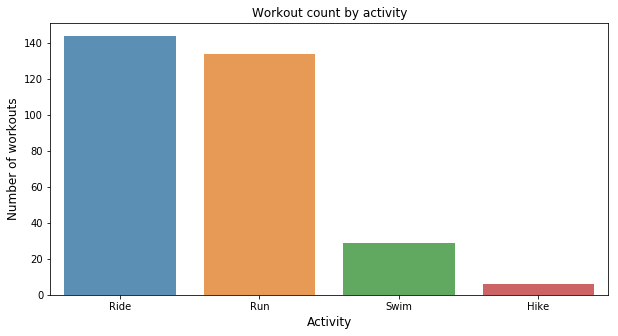

In [18]:
type_count  = df['type'].value_counts()
type_count = type_count[:4,]
plt.figure(figsize=(10,5))
sns.barplot(type_count.index, type_count.values, alpha=0.8)
plt.title('Workout count by activity')
plt.ylabel('Number of workouts', fontsize=12)
plt.xlabel('Activity', fontsize=12)
plt.show()

In [19]:
#Counts of activites
df.type.value_counts()

Ride    144
Run     134
Swim     29
Hike      6
Name: type, dtype: int64

In [20]:
#total hours of training
df['hours'].sum()

299.43

In [21]:
# total hours for the year by activity
(df.groupby('type')['hours'].sum())

type
Hike      7.69
Ride    181.69
Run      93.70
Swim     16.35
Name: hours, dtype: float64

# Longest activities in miles for the year

In [22]:
# longest activities of the year in miles
df.groupby('type')['distance'].nlargest(1)

type     
Hike  78      7.13
Ride  9      67.89
Run   256    10.09
Swim  305     1.77
Name: distance, dtype: float64

# Fastest workouts of the year by activity

All swims for the year were logged manually. The Garmin Forerunner 235 watch is built specifically for running.

In [23]:
swims = df.loc[(df['type'] == 'Swim')]

swims_df = swims.sort_values(by = 'average_speed', ascending = False) 

swims_df.head(5)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
248,Morning Swim,Swim,0.93,26.65,0:26:39,2.10,0.0,NaN,NaN,NaN,...,NaN,2020-03-08 13:46:20+00:00,0,0,0.44,2020,3,2020-03,10,Sunday
285,Morning Swim,Swim,0.93,26.98,0:26:59,2.07,0.0,NaN,NaN,NaN,...,NaN,2020-01-26 14:07:51+00:00,0,0,0.45,2020,1,2020-01,4,Sunday
30,Afternoon Swim,Swim,0.78,22.82,0:22:49,2.05,0.0,NaN,NaN,NaN,...,NaN,2020-10-22 21:16:39+00:00,0,0,0.38,2020,10,2020-10,43,Thursday
280,Morning Swim,Swim,1.03,30.08,0:30:05,2.05,0.0,NaN,NaN,NaN,...,NaN,2020-01-31 12:48:00+00:00,0,0,0.50,2020,1,2020-01,5,Friday
277,Morning Swim,Swim,0.93,27.47,0:27:28,2.04,0.0,NaN,NaN,NaN,...,NaN,2020-02-02 13:57:27+00:00,0,0,0.46,2020,2,2020-02,5,Sunday


Only view rides done outdoors. Factor in slowing down for red lights for average speed. Race situation, average speed would (hopefully) be higher.

In [24]:
rides = df.loc[(df['type'] == 'Ride') & df['indoor_flag'] == 0]

ride_df = rides.sort_values(by = 'average_speed', ascending = False) 

ride_df.head(5)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
66,Morning Ride,Ride,35.74,119.20,1:59:52,18.01,27.33,152.3,171.0,164.0,...,582.71,2020-09-27 14:09:11+00:00,0,Zone 2,1.99,2020,9,2020-09,39,Sunday
125,Morning Ride,Ride,33.68,113.10,1:53:06,17.89,25.54,163.5,180.0,225.0,...,597.47,2020-08-15 13:54:33+00:00,0,Zone 3,1.88,2020,8,2020-08,33,Saturday
112,Morning Ride,Ride,31.36,108.17,1:48:10,17.42,23.52,148.1,166.0,126.0,...,581.07,2020-08-26 11:17:40+00:00,0,Zone 2,1.80,2020,8,2020-08,35,Wednesday
121,Morning Ride,Ride,24.01,83.15,1:23:54,17.35,23.07,78.5,79.0,7.0,...,582.71,2020-08-19 11:40:28+00:00,0,Zone 1,1.39,2020,8,2020-08,34,Wednesday
104,Morning Ride,Ride,31.08,107.82,1:49:26,17.32,31.36,151.1,171.0,137.0,...,582.71,2020-08-30 15:26:38+00:00,0,Zone 2,1.80,2020,8,2020-08,35,Sunday


Zone 3 and Zone 4 tempo and threshold efforts no longer than 5mi

In [25]:
runs = df.loc[(df['type'] == 'Run')]

run_df = runs.sort_values(by = 'average_speed', ascending = False) 

run_df.head(5)

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
3,20 min Tempo Run,Run,3.00,20.05,0:20:03,9.00,10.08,181.8,189.0,67.0,...,585.66,2020-11-11 16:55:52+00:00,0,Zone 4,0.33,2020,11,2020-11,46,Wednesday
118,Uptempo,Run,2.01,14.95,0:14:57,8.06,9.41,180.7,190.0,54.0,...,587.30,2020-08-22 12:06:56+00:00,0,Zone 4,0.25,2020,8,2020-08,34,Saturday
81,"4x 800m, 400m recovery",Run,2.98,22.47,0:22:28,7.98,11.87,175.4,190.0,70.0,...,582.71,2020-09-18 12:17:54+00:00,0,Zone 3,0.37,2020,9,2020-09,38,Friday
50,Steady Run,Run,5.02,38.92,0:39:39,7.75,12.77,168.5,185.0,96.0,...,577.78,2020-10-07 21:13:57+00:00,0,Zone 3,0.65,2020,10,2020-10,41,Wednesday
199,"1mi easy, 3mi steady",Run,4.04,31.57,0:32:18,7.70,10.08,172.0,190.0,86.0,...,591.24,2020-05-13 16:29:31+00:00,0,Zone 3,0.53,2020,5,2020-05,20,Wednesday


# Total hours trained per month
Took a trip to CO end of September. Hikes accounting for over 7 hours of total count.

In [26]:
# Total hours of training per month
df.groupby(['month_year'])['hours'].sum()

month_year
2020-01    27.04
2020-02    22.21
2020-03    21.19
2020-04    17.62
2020-05    14.17
2020-06    27.04
2020-07    34.04
2020-08    38.16
2020-09    46.04
2020-10    36.64
2020-11    15.28
Name: hours, dtype: float64

In [27]:
activity_month = df.groupby(['month_year'])['hours'].sum().reset_index(name='hours')

alt.Chart(activity_month).mark_bar(size=25).encode(
    x=alt.X('month_year:T', axis=alt.Axis(title='Month')),
    y='hours:Q'
).properties(
    width=800,
    height=200,
    title='Hours trained per month in 2020'
)

alt.Chart(...)

# Total hours of training per week

In [28]:
# Total hours of training per week
df.groupby(['week_no'])['hours'].sum()

week_no
1      4.99
2      7.09
3      4.69
4      7.23
5      7.82
6      0.59
7      2.61
8      8.12
9      7.72
10     8.20
11     3.27
12     4.96
13     2.52
14     2.85
15     4.58
16     4.83
17     4.56
18     4.17
19     1.09
20     2.77
21     3.71
22     3.86
23     4.17
24     5.21
25     6.77
26     8.67
27     7.20
28     5.70
29     9.56
30     8.31
31     8.69
32     4.47
33     8.77
34    10.11
35    11.61
36     8.34
37     7.97
38    10.32
39    14.75
40     9.75
41     7.07
42     8.33
43     9.31
44     9.14
45     8.99
46     3.99
Name: hours, dtype: float64

In [29]:
activity_week = df.groupby(['week_no'])['hours'].sum().reset_index(name='hours')

alt.Chart(activity_week).mark_bar(size=10).encode(
    x=alt.X('week_no:T', axis=alt.Axis(title='Week')),
    y='hours:Q'
).properties(
    width=500,
    height=200,
    title='Hours trained per week in 2020'
)

alt.Chart(...)

# Average hours of training per week to date

In [30]:
#calculate average hours of training per week to date
week = df['week_no']
max_week = week.max()
total_hours_trained = df['hours'].sum()
round((total_hours_trained / max_week),2) 

6.51

# Average moving time per activity

In [31]:
#Average time of each activity
round((df['moving_time'].mean()),2)

57.42

# Average hours of training during the week by day

In [32]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

bar = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X('day_of_week', sort=days, axis=alt.Axis(title='Day of the Week')),
    y='mean(hours)',
    color='mean(hours):Q'
)

rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(hours):Q'
)

(bar + rule).properties(
    width=500,
    title='Activity hours by day of the week'
)

alt.LayerChart(...)

In [33]:
#Describe average heartrate by activity type
df.groupby('type')[['average_heartrate']].describe()

average_heartrate                                                         \
                 count        mean        std    min     25%     50%      75%   
type                                                                            
Hike               6.0  117.983333   6.158707  108.6  114.25  119.25  123.125   
Ride             133.0  138.384211  14.657674   78.5  136.10  142.50  147.100   
Run              130.0  156.287692   9.309011  113.1  151.30  155.80  161.050   
Swim               0.0         NaN        NaN    NaN     NaN     NaN      NaN   

             
        max  
type         
Hike  123.8  
Ride  163.5  
Run   181.8  
Swim    NaN

In [34]:
#Describe max heartrate by activity type
df.groupby('type')[['max_heartrate']].describe()

max_heartrate                                                            
             count        mean        std    min     25%    50%     75%    max
type                                                                          
Hike           6.0  152.500000   5.540758  146.0  149.25  151.0  155.75  161.0
Ride         133.0  160.624060  16.018740   79.0  156.00  163.0  169.00  197.0
Run          130.0  174.392308  10.062977  149.0  168.00  174.5  181.75  200.0
Swim           0.0         NaN        NaN    NaN     NaN    NaN     NaN    NaN

In [35]:
df_num_corr = df.corr()['average_heartrate'][:-1]
relevant_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
relevant_features

average_heartrate         1.000000
max_heartrate             0.828541
average_cadence           0.681813
average_watts             0.632720
weighted_average_watts    0.614075
Name: average_heartrate, dtype: float64

# Average Heartrate Histogram
My heart rate for majority of my activities at the beginning of the year was in "Zone 2" between 60-75% of my maximum heart rate. These relatively easier efforts allowed me to maintain consistent training, recover adequately and slowly develop an aerobic engine without feeling physically drained.

In [36]:
alt.Chart(df).mark_bar().encode(
    alt.X("average_heartrate:Q",bin=alt.Bin(step=10)),
    y=alt.Y('count(activity_id):Q', axis=alt.Axis(title='# of activities'))).properties(
    width=500,
    title='Average Heartrate Histogram')

alt.Chart(...)

# Time spent in heart rate zone
Treadmill runs and swims account for the '0' heartrate zones

In [37]:
df.groupby(['heartrate_zone'])['hours'].sum()

heartrate_zone
0          30.43
Zone 1     33.35
Zone 2    214.25
Zone 3     20.26
Zone 4      1.14
Name: hours, dtype: float64

# Heartrate barplot by zone

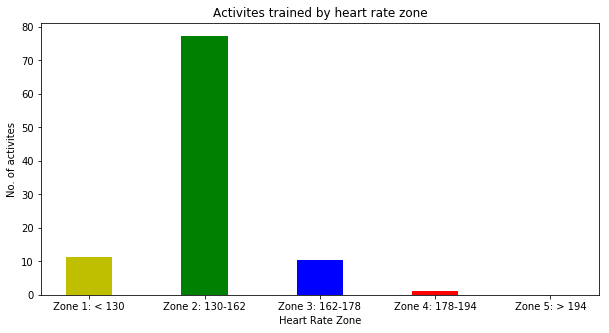

In [38]:
# Prepare the heartrate data for barplot
counts = [0, 0, 0, 0, 0]
 
hrdata = df['average_heartrate']
for point in hrdata:
        if (point <= 130):
            counts[0] += 1
        elif (point > 130 and point <= 162):
            counts[1] += 1
        elif (point > 162 and point <= 178):
            counts[2] += 1
        elif (point > 178 and point <= 194):
            counts[3] += 1
        elif (point > 194):
            counts[4] += 1
tmp = counts
total = sum(tmp)
counts = [(1. * x / total) * 100 for x in tmp]

# creating the dataset 
data = {'Zone 1: < 130':counts[0], 'Zone 2: 130-162':counts[1], 'Zone 3: 162-178':counts[2],  
        'Zone 4: 178-194':counts[3], 'Zone 5: > 194': counts[4]} 
    
hrz = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(hrz, values, color ='ygbrr',  
        width = 0.4) 
  
plt.xlabel("Heart Rate Zone") 
plt.ylabel("No. of activites") 
plt.title("Activites trained by heart rate zone") 
plt.show() 

# Heartrate Intensity
Strava's 'Relative Effort' is an analysis of heart rate data and intensity.
***The suffer score metric is only available to Premium Strava subscribers.***

In [39]:
#https://alancouzens.com/blog/optimal_periodization.html
# put training volume per month + average suffer score in an array ==> possible next functionality
# average suffer score from the year
round((df['suffer_score'].mean()),2)

62.65

In [40]:
# average intensity each month
round((df.groupby(['month'])['suffer_score'].mean()),2)

month
1     65.50
2     56.93
3     49.52
4     39.21
5     38.85
6     78.78
7     81.25
8     78.78
9     63.91
10    61.74
11    61.93
Name: suffer_score, dtype: float64

# Monthly Intensity Average
Because of COVID-19 I was hesitant and fearful to train in the Spring with triathlons being cancelled and postponed. With reopenings and more availability to routes in June, I decided to ramp up in training and maintain consistency. As temperatures dropped in the Fall, my relative intensity fell with slightly higher volumes. This can indicate gains in fitness from acclimation to the heat or from consistency. I find that workouts in the Fall, Winter and early Spring are easier for as my body is more comfortable in cooler temperatures.

In [41]:
bar = alt.Chart(df).mark_bar(size=30).encode(
    x=alt.X('month', sort=days, axis=alt.Axis(title='Month')),
    y='mean(suffer_score)',
    color='mean(suffer_score):Q'
)

rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(suffer_score):Q'
)

(bar + rule).properties(
    width=500,
    title='Intensity Average'
)

alt.LayerChart(...)

# Weekly Intenisty

In [42]:
#current week statistics
current_week_df = df.loc[df['week_no'] == df['week_no'].max()]

In [43]:
current_week_df

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
0,Lunch Run with Brady,Run,5.02,46.27,0:48:36,6.51,10.75,155.5,183.0,55.0,...,578.11,2020-11-13 17:15:05+00:00,0,Zone 2,0.77,2020,11,2020-11,46,Friday
1,London,Ride,14.12,45.43,0:45:26,18.67,37.86,135.3,159.0,20.0,...,9.84,2020-11-12 13:10:50+00:00,1,Zone 2,0.76,2020,11,2020-11,46,Thursday
2,Cool down,Run,1.02,9.68,0:09:44,6.31,8.51,155.3,160.0,12.0,...,585.66,2020-11-11 17:19:49+00:00,0,Zone 2,0.16,2020,11,2020-11,46,Wednesday
3,20 min Tempo Run,Run,3.00,20.05,0:20:03,9.00,10.08,181.8,189.0,67.0,...,585.66,2020-11-11 16:55:52+00:00,0,Zone 4,0.33,2020,11,2020-11,46,Wednesday
4,Warm up,Run,1.03,8.98,0:08:59,6.86,10.30,145.6,160.0,5.0,...,585.99,2020-11-11 16:44:37+00:00,0,Zone 2,0.15,2020,11,2020-11,46,Wednesday
5,Watopia,Ride,20.18,60.82,1:01:56,19.93,24.86,138.8,158.0,29.0,...,41.34,2020-11-10 21:57:44+00:00,1,Zone 2,1.01,2020,11,2020-11,46,Tuesday
6,Morning Run with Brady,Run,5.03,48.75,0:51:08,6.19,11.65,146.7,161.0,33.0,...,578.11,2020-11-10 12:56:37+00:00,0,Zone 2,0.81,2020,11,2020-11,46,Tuesday


In [44]:
#last week statistics
last_week_df = df.loc[df['week_no'] == df['week_no'].max()-1]

In [45]:
last_week_df

,name,type,distance,moving_time,elapsed_time,average_speed,max_speed,average_heartrate,max_heartrate,suffer_score,...,elev_low,start_date,indoor_flag,heartrate_zone,hours,year,month,month_year,week_no,day_of_week
7,Morning Run,Run,6.29,57.30,0:57:38,6.59,9.18,153.9,168.0,81.0,...,578.11,2020-11-08 16:28:59+00:00,0,Zone 2,0.96,2020,11,2020-11,45,Sunday
8,Morning Swim,Swim,0.96,29.90,0:29:54,1.94,0.00,NaN,NaN,NaN,...,NaN,2020-11-08 13:41:44+00:00,0,0,0.50,2020,11,2020-11,45,Sunday
9,WE’RE GOING STREAKING🇺🇸🇺🇸🇺🇸,Ride,67.89,243.08,4:05:32,16.78,28.22,149.1,170.0,283.0,...,585.33,2020-11-07 13:35:23+00:00,0,Zone 2,4.05,2020,11,2020-11,45,Saturday
10,Lunch Run,Run,5.02,43.70,0:45:23,6.90,9.63,161.9,180.0,82.0,...,585.66,2020-11-06 17:52:41+00:00,0,Zone 2,0.73,2020,11,2020-11,45,Friday
11,Watopia,Ride,17.14,50.92,0:50:55,20.23,26.21,136.5,156.0,30.0,...,41.34,2020-11-05 17:51:34+00:00,1,Zone 2,0.85,2020,11,2020-11,45,Thursday
12,Lunch Run,Run,5.02,43.37,0:43:40,6.95,9.41,157.7,174.0,68.0,...,583.36,2020-11-04 17:11:29+00:00,0,Zone 2,0.72,2020,11,2020-11,45,Wednesday
13,Easy 4 with a 1mi pickup to finish,Run,5.02,41.83,0:42:15,7.21,11.87,156.9,179.0,64.0,...,585.66,2020-11-03 18:07:03+00:00,0,Zone 2,0.70,2020,11,2020-11,45,Tuesday
14,Morning Swim,Swim,0.93,29.08,0:29:05,1.93,0.00,NaN,NaN,NaN,...,NaN,2020-11-03 13:33:00+00:00,0,0,0.48,2020,11,2020-11,45,Tuesday


In [46]:
line_chart = pygal.Line()
line_chart.title = 'Weekly Intensity'
line_chart.x_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
line_chart.add('Current Week', [current_week_df.loc[(current_week_df['day_of_week'] == 'Monday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Tuesday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Wednesday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Thursday')]['suffer_score'].sum(),
                               current_week_df.loc[(current_week_df['day_of_week'] == 'Friday')]['suffer_score'].sum()
                               ,current_week_df.loc[(current_week_df['day_of_week'] == 'Saturday')]['suffer_score'].sum()
                               ,current_week_df.loc[(current_week_df['day_of_week'] == 'Sunday')]['suffer_score'].sum()])

line_chart.add('Last Week', [last_week_df.loc[(last_week_df['day_of_week'] == 'Monday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Tuesday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Wednesday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Thursday')]['suffer_score'].sum(),
                               last_week_df.loc[(last_week_df['day_of_week'] == 'Friday')]['suffer_score'].sum()
                               ,last_week_df.loc[(last_week_df['day_of_week'] == 'Saturday')]['suffer_score'].sum()
                               ,last_week_df.loc[(last_week_df['day_of_week'] == 'Sunday')]['suffer_score'].sum()])
line_chart.render_to_file('weekly_intensity.svg')
#.render_in_browser()

# Average heartrate and speed (mph)

In [47]:
brush = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
    x='average_speed:Q',
    y='average_heartrate:Q',
    color=alt.condition(brush, 'type:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(df).mark_bar().encode(
    y='type:N',
    color='type:N',
    x='count(type):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

# Current Week Training Log

In [48]:
dot_chart = pygal.Dot(x_label_rotation=10)
dot_chart.title = 'Current Week Training Log'
dot_chart.x_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dot_chart.add('Swim', [round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Monday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Tuesday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Wednesday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Thursday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Friday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Saturday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Swim') & (current_week_df['day_of_week'] == 'Sunday')]['hours'].sum(),2)])

dot_chart.add('Bike', [round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Monday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Tuesday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Wednesday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Thursday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Friday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Saturday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Ride') & (current_week_df['day_of_week'] == 'Sunday')]['hours'].sum(),2)])

dot_chart.add('Run', [round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Monday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Tuesday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Wednesday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Thursday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Friday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Saturday')]['hours'].sum(),2),
                      round(current_week_df.loc[(current_week_df['type'] == 'Run') & (current_week_df['day_of_week'] == 'Sunday')]['hours'].sum(),2)])


dot_chart.render_to_file('current_week_log.svg')